In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('crypto.csv', header=[0, 1], index_col=[0], parse_dates=[0])
df.head()

Price          close                                                   \
Ticker           ada          btc      doge         eth sol       xrp   
Date                                                                    
2020-01-01  0.033458  7200.174316  0.002033  130.802002 NaN  0.192667   
2020-01-02  0.032751  6985.470215  0.002009  127.410179 NaN  0.188043   
2020-01-03  0.034180  7344.884277  0.002145  134.171707 NaN  0.193521   
2020-01-04  0.034595  7410.656738  0.002241  135.069366 NaN  0.194355   
2020-01-05  0.034721  7411.317383  0.002419  136.276779 NaN  0.195537   

Price           High                                     ...      Open  \
Ticker           ada          btc      doge         eth  ...      doge   
Date                                                     ...             
2020-01-01  0.033813  7254.330566  0.002052  132.835358  ...  0.002028   
2020-01-02  0.033507  7212.155273  0.002110  130.820038  ...  0.002034   
2020-01-03  0.034427  7413.715332  0.002177  134.554016  ...  0.002008   
2020-01-04  0.034685  7427.385742  0.002490  136.052719  ...  0.002144   
2020-01-05  0.035356  7544.497070  0.002491  139.410202  ...  0.002240   

Price                                   volume                         \
Ticker             eth sol       xrp       ada          btc      doge   
Date                                                                    
2020-01-01  129.630661 NaN  0.192912  22948374  18565664997  51180941   
2020-01-02  130.820038 NaN  0.192708  20843934  20802083465  65071106   
2020-01-03  127.411263 NaN  0.187948  30162644  28111481032  62619988   
2020-01-04  134.168518 NaN  0.193521  29535781  18444271275  94227582   
2020-01-05  135.072098 NaN  0.194367  21479178  19725074095  52631740   

Price                                    
Ticker              eth sol         xrp  
Date                                     
2020-01-01   7935230330 NaN  1041134003  
2020-01-02   8032709256 NaN  1085351426  
2020-01-03  10476845358 NaN  1270017043  
2020-01-04   7430904515 NaN   999331594  
2020-01-05   7526675353 NaN  1168067557  

[5 rows x 30 columns]

In [35]:
btc = df[('close', ['btc', 'eth'])].dropna().to_frame()
btc.head()

InvalidIndexError: ('close', ['btc', 'eth'])

In [21]:
btc.columns = btc.columns.droplevel(0)
btc.head()

,Price
Date,
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738
2020-01-05,7411.317383


In [22]:
btc.rename(columns={'btc': 'Price'}, inplace=True)
btc.head()

,Price
Date,
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738
2020-01-05,7411.317383


Оценка производительности: Процентная доходность позволяет сравнивать изменения цен независимо от абсолютных значений (например, BTC с ценой $70,000 против ETH с ценой $3,000).

In [23]:
btc['Returns'] = btc['Price'].pct_change(periods = 1) * 100
btc.head()

,Price,Returns
Date,,
2020-01-01,7200.174316,NaN
2020-01-02,6985.470215,-2.981929
2020-01-03,7344.884277,5.145166
2020-01-04,7410.656738,0.895487
2020-01-05,7411.317383,0.008915


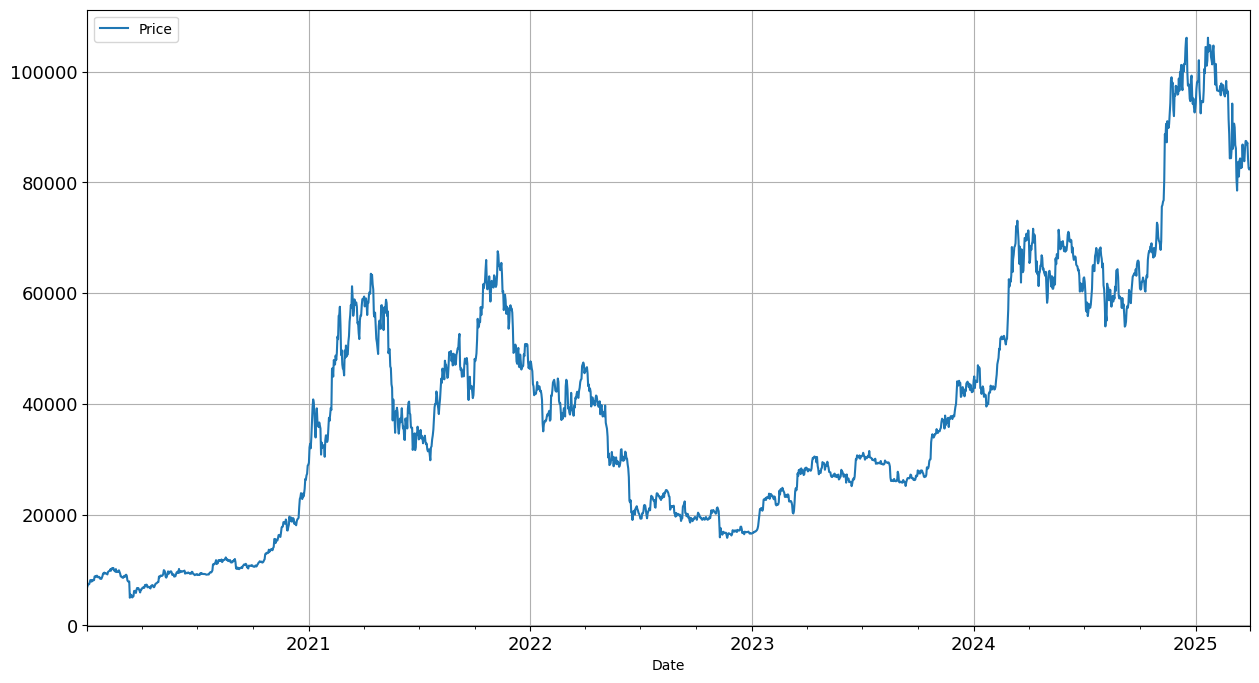

In [29]:
btc['Price'].plot(figsize=(15, 8), fontsize=13)
plt.grid(True)
plt.legend()
plt.show()

plt.close()

In [24]:
btc = btc.dropna()
btc.head()

,Price,Returns
Date,,
2020-01-02,6985.470215,-2.981929
2020-01-03,7344.884277,5.145166
2020-01-04,7410.656738,0.895487
2020-01-05,7411.317383,0.008915
2020-01-06,7769.219238,4.829126


Стандартное отклонение доходности: Мера разброса доходности вокруг среднего значения (mu), отражающая риск или волатильность. Чем выше sigma, тем больше колебания доходности.

Использование в финансовой аналитике: sigma помогает оценить риск инвестиций, часто используется в моделях вроде CAPM (Capital Asset Pricing Model) для расчёта систематического риска.

In [25]:
sigma = btc['Returns'].std()
sigma

np.float64(3.327288332510459)

Средняя арифметическая доходность: Это среднее значение доходности за период, представляющее ожидаемую доходность или награду. Она показывает средний прирост (или убыток) за период.

Использование в финансовой аналитике: mu используется для оценки средней эффективности инвестиций, например, для сравнения доходности BTC с другими активами (ETH, индексы рынка).

In describe() method its like mean 0.18% per day

In [27]:
mu = btc['Returns'].mean()
mu

np.float64(0.18374555932013803)

In [30]:
btc.describe()

,Price,Returns
count,1916.000000,1916.000000
mean,39013.514046,0.183746
std,23942.861191,3.327288
min,4970.788086,-37.169539
25%,20189.397461,-1.309413
50%,34668.164062,0.043206
75%,56415.644531,1.648230
max,106146.265625,18.746474


Интеграция в анализ<br>
-> Доходность (Returns): Считается на основе btc['btc'] (или btc['Price'], если вы переименовали), что даёт процентное изменение цен.<br>
-> Средняя доходность (mu): Отражает среднюю награду (например, 2.367% в примере).<br>
-> Волатильность (sigma): Оценивает риск (например, 4.274%), показывая, насколько доходность отклоняется от среднего.<br>
-> Финансовый анализ: Комбинация этих метрик помогает принимать решения: высокая mu с низкой sigma — привлекательная инвестиция; высокая mu с высокой sigma — высокорисковая, но потенциально прибыльная.